# Computational Methods in Economics (winter term 2019/20)

## Problem Set 2

#### DEADLINE: Wednesday, November 27, 12 pm

In [1]:
import numpy as np

## Question 1

Consider the polynomial expression
\begin{equation*}
	p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_N x^N = \sum_{n=0}^N a_n x^n,
\end{equation*}
where $x$ is a scalar number.

(a) Write a Python function **poly(xx, coeff)** that implements $p(x)$ (i.e. evaluates the polynomial) given a point (i.e. a scalar) **xx** and a list of coefficients **coeff** ($= a_0,...,a_N$). Use a loop with **enumerate()**.

(b) Write a new function **poly_np(xx, coeff)** that does the same job, but uses NumPy arrays and vectorized operations, rather than any form of Python loop. 

*Hint*: You can use **np.cumprod()** here. Using **np.cumprod()** on a sequence gives an array where at each position, you have the product of all elements that come before or at that position in the original array. For example, **np.cumprod([2,3,4,5])** would return **[2,6,24,120]** as a NP array. 

(c) Using **%time**, check how long it takes for both functions to run when **len(coeff)** = 50000 (you can use random draws from a uniform distribution for the elements in **coeff**).


In [2]:
## (a)
def poly(x, coeff):
    '''
    Evaluates a polynomial p(x) = a_0 + a_1 x + a_2 x^2 + ... + a_N x^N using a loop
    '''
    ### BEGIN SOLUTION
    # initialize s as 0
    s = 0
    for (i, a) in enumerate(coeff):
        # for each iteration, add the corresponding term to s
        s = s + a * x**i    
    return s

    ## Note that we can implement the exact same algorithm in one line:    
#     def poly(x, coeff):
#         return sum(a * x**i for i, a in enumerate(coeff))

    ### END SOLUTION

In [3]:
assert poly(1, [1,1,1]) == 3
assert poly(2, [1,2,4]) == 21

In [4]:
import numpy as np

## (b)
def poly_np(x, coeff):
    '''
    Evaluates a polynomial p(x) = a_0 + a_1 x + a_2 x^2 + ... + a_N x^N using NP arrays and cumprod
    '''
    ### BEGIN SOLUTION
    # For the function here, we need to apply **np.cumprod()** on an array **[1, x, x, x, ..]**, 
    # which would return **[1, x, x^2, x^3,...]**. We can use the inner product of this array and **coeff**.
    
    # define X = [1, x, x, ...]
    X = np.zeros(len(coeff))
    X[0] = 1
    X[1:] = x
    # using cumprod on X gives [1 x x^2 x^3 ...]
    y = np.cumprod(X)
    # compute and return inner product
    return coeff @ y

    ## As an alternative, note that a vectorized operations also works if the array is in the exponent. 
    ## In other words, implementing something like $x^np.array([0,1,2])$ in Python, where $x$ is a scalar, would give $[x^0, x^1, x^2]$. 
    ## Again, this works only if the sequence $[0,1,2]$ is a NumPy array. 

# def poly_np2(x, coeff):
#     return coeff @ x**np.linspace(0,len(coeff)-1,len(coeff))
    
    ### END SOLUTION

In [5]:
# THIS IS A TEST CELL!
### BEGIN HIDDEN TESTS
assert poly_np(1, [1,1,1]) == 3.0
assert poly_np(2, [1,2,4]) == 21.0
### END HIDDEN TESTS

In [6]:
## (c)

### BEGIN SOLUTION
# use random module to assign arbitrary values to coeff
N = 50000
coeff = np.random.uniform(0, 1, N)
x = 0.1

%time print(poly(x, coeff))
%time print(poly_np(x, coeff))

### END SOLUTION

0.04445244713769487
Wall time: 79.8 ms
0.04445244713769487
Wall time: 16.5 ms


In [7]:
# THIS IS A TEST CELL!
### BEGIN HIDDEN TESTS
y = %timeit -r1 -n1 -o poly(x, coeff)
z = %timeit -r1 -n1 -o poly_np(x, coeff)

assert z.best < y.best
### END HIDDEN TESTS

107 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
695 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Question 2

Write a function **compute_pi** that computes an approximation to the number $\pi$ with the Monte Carlo method. The following is adapted from http://mathfaculty.fullerton.edu/mathews/n2003/montecarlopimod.html (check the link for more information and illustrations):

"Monte Carlo methods can be thought of as statistical simulation methods that utilize a sequences of random numbers to perform the simulation. The name "Monte Carlo" was coined by Nicholas Constantine Metropolis (1915-1999) and inspired by Stanslaw Ulam (1909-1986), because of the similarity of statistical simulation to games of chance, and because Monte Carlo is a center for gambling and games of chance. In a typical process one computes the number of points in a set B that lies inside box A. The ratio of the number of points that fall inside A to the total number of points tried is equal to the ratio of the two areas.  The accuracy of the ratio $\rho$ depends on the number of points used, with more points leading to a more accurate value."

A simple Monte Carlo simulation to approximate the value of $\pi$ involves randomly selecting points $\{(x_i, y_i)\}_{i =1}^n$ in the unit square and determining the ratio $\rho = m/n$, where $m$ is the number of points that is within a circle with radius 0.5, i.e. that satisfy 
$$
\sqrt{(x_i-0.5)^2 + (y_i-0.5)^2} \le 0.5
$$

In other words: 
- If $U$ is a bivariate uniform random variable on the unit square $ A = (0,1)^2$, then the probability that a realization of $U$ (i.e. a random draw from two uniform distributions between 0 and 1) lies in a subset $B$ *is equal to the area of* $B$.
- If $U_1,...,U_n$ are independently distributed realizations of $U$, then, as $n$ gets large, the fraction of random draws that fall in $B$ converges to the probability of landing in $B$.
- In this case, $B$ is a circle in the unit square with radius $r = 0.5$. Recall that for a circle, $area = \pi \cdot r^2$.

Try to implement this function without using loops (but feel free to use a loop if you do not manage otherwise!).

In [8]:
# function throws gives 
def compute_pi(n):
    '''
    Approximates pi as the fraction of random draws ("throws") that land in the unit cycle = area of unit cycle 
    '''
    ### BEGIN SOLUTION

#     ## Alternative 1: loop    
#     count = 0
#     for i in range(n):
#         x, y = np.random.uniform(0,1), np.random.uniform(0,1) # x-coordinate, y-coordinate
#         if np.sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
#             count += 1
#     return (count/n) / 0.5**2

    ## Alternative 2: vectorized operation
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    
    area = np.sum(np.sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5) / n
    
    return area / 0.5**2
    
    ### END SOLUTION

In [9]:
## The following two numbers should be close too each other
print(compute_pi(100000))
print(np.pi)

3.13796
3.141592653589793


In [10]:
# THIS IS A TEST CELL!
### BEGIN HIDDEN TESTS
assert abs(compute_pi(int(1e+6)) - np.pi) < 1e-2
### END HIDDEN TESTS

## Question 3

Consider the utility function $U(B,C)=B^{\alpha} C^{(1-\alpha)}$ of a Oktoberfest visitor consuming beer (B) and chicken (C).

(a) Write a function **utility** that returns the utilily depending on the amount of consumed chicken and beers

(b) Plot the utility as a function of the amount of beer with $\alpha=0.7$ and $C=2$. The range of beers should be from 0 to 10. Add a title, axis labels and a legend. 

(C) Plot the isoquants of the same utility for all combination of C and B in the range from 0 to 10. In addition, consider the prices of $p_B=10 €$ and $p_C=10€$ and a budget of 55€. Draw the budgetline in the graph with the isoquants and guess what the optimal consumption might be. Add a title and axis labels.

Hints: Make sure to display the graph only for reasonable values. You can set the limits of the x and the y axis by **ax.set_xlim([xlim,xmax])** and **ax.set_ylim([ylim,ymax])**.

In [11]:
## (a)
import numpy as np

### BEGIN SOLUTION
def utility(B,C,alpha):
    '''
    Implements the utility function 
    '''
    return (B**alpha)*(C**(1-alpha))
### END SOLUTION

In [12]:
assert float(utility(1,4,0.5)) == 2.0
assert float(utility(4,0,1)) == 4.0

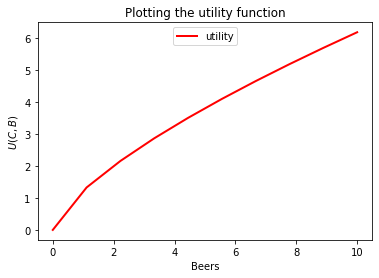

In [13]:
## (b)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
### BEGIN SOLUTION
B = np.linspace(0,10,10)
u = utility(B, 2, 0.7)
ax.plot(B, u, 'r-', linewidth=2, label = 'utility')
ax.set_title('Plotting the utility function')
ax.set_xlabel('Beers')
ax.set_ylabel('$U(C,B)$')
ax.legend(loc = 'upper center')
### END SOLUTION

(0, 10)

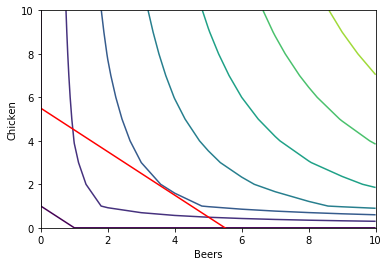

In [14]:
## (c)

### BEGIN SOLUTION
N = 11
## interpolate both production factors over equidistant grid
C = np.linspace(0, 10, N)
B = np.linspace(0, 10, N)
## use meshgrid function 
X, Y = np.meshgrid(C, B)
U = utility(X, Y, 0.7)

## plot contour
fig, ax = plt.subplots()
ax.contour(C, B, U, cmap = 'viridis')
ax.set_xlabel('Beers')
ax.set_ylabel('Chicken')

## Budget constraint
def chicken(B):
    return (5.5-B)

ax.plot(B,chicken(B),'r')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

### END SOLUTION

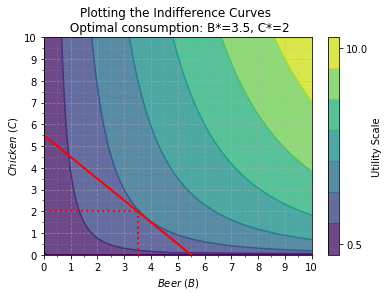

In [15]:
## More fancy solutions

N = 100
## interpolate both production factors over equidistant grid
B = np.linspace(0, 10, N)
C = np.linspace(0, 10, N)
## use meshgrid function 
X, Y = np.meshgrid(B, C)
Z = utility(X ,Y ,0.7)

## budget constraint
xx = np.linspace(0,10,100)
yy = 5.5 - xx

## plot contour
fig, ax = plt.subplots()
contour = ax.contour(B, C, Z, cmap='viridis')
contour_filled = plt.contourf(X, Y, Z, alpha = 0.8)

# Labeling
ax.set_title('Plotting the Indifference Curves \n Optimal consumption: B*=3.5, C*=2')
ax.set_ylabel('$Chicken~(C)$')
ax.set_xlabel('$Beer~(B)$')
plt.colorbar(ticks = [0.5, 10], label='Utility Scale')

# Budget constraint and guess of the optimal tuple
plt.plot(xx, yy, 'r-', linewidth = 2)
plt.plot([0, 3.5], [2, 2], 'r:', lw = 2,) # Chicken = 2
plt.plot([3.5, 3.5], [0, 2], 'r:', lw = 2) # Beer = 3.5

major_ticks = np.arange(0, 10.5, 1)
minor_ticks = np.arange(0, 10.5, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor = True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor = True)

ax.grid(which='both')

ax.grid(which='minor', alpha = 0.2, linestyle='--')
ax.grid(which='major', alpha = 0.5, linestyle='--')

ax.set_xlim([0,10])
ax.set_ylim([0,10]);

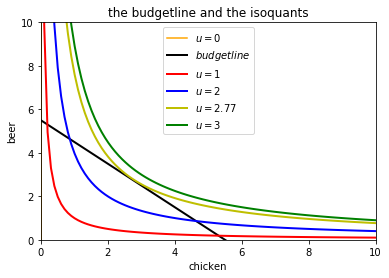

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
def isoquant(utility,chicken,alpha):
    import math
    beer = pow((utility/pow(chicken,(1-alpha))),1/alpha)
    return beer
cc = np.linspace(0.00001,10,100)
b = np.linspace(0.00001,10,100)
bb = 5.5 - cc
c0 = np.zeros(100)
b0 = np.zeros(100)
ax.plot(c0,b,'orange',label='$u=0$')
ax.plot(b0,cc,'orange')
ax.plot(cc,bb,'black',linewidth=2,label='$budget line$')
ax.plot(cc,isoquant(1,cc,0.5),'r-',linewidth=2,label='$u=1$')
ax.plot(cc,isoquant(2,cc,0.5),'b-',linewidth=2,label='$u=2$')
ax.plot(cc,isoquant(2.77,cc,0.5),'y-',linewidth=2,label='$u=2.77$')
ax.plot(cc,isoquant(3,cc,0.5),'g-',linewidth=2,label='$u=3$')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title('the budgetline and the isoquants')
ax.set_xlabel('chicken')
ax.set_ylabel('beer')
ax.legend(loc='upper center');

## Question 4 

(a) Write a function **backward_sub** that implements the backward-substitution algorithm to solve an upper triangular system of equations in Python. Its inputs are a square matrix (2D array) and a flat 1D array. 

As a first step, derive an expression for $x_i$, analogous to the case of forward-substitution in the lecture.

(b) Write a function **my_solve** that solves a linear system of equations, using LU factorization, backward and forward substitution. For backward substitution, use your code from question (a). For forward substitution, you can use the function defined in the lecture (see below). For LU factorization, use the **scipy.linalg.lu** function.

*Do not use **np.linalg.solve** or **scipy.linalg.solve** in your function!* 

In [17]:
import scipy.linalg

def forward_sub(A, b):
    """
    Implements the forward-substitution algorithm to solve a lower triangular system of equations
    
    (2D np array, 1D np array) -> (1D np array)
    """
    n, m = A.shape
    
    assert n == m, "A must be a square matrix"
    
    x = np.zeros(n)
    
    for i in range(n):
        
        summ = 0
        for j in range(i):
            summ += A[i, j] * x[j]
        
        x[i] = (b[i] - summ) / A[i, i]   
    
    return x

In [18]:
## (a)

def backward_sub(A, b):
    """
    Implements the backward-substitution algorithm to solve an upper triangular system of equations 
    
    (2D np array, 1D np array) -> (1D np array)
    
    """
    ### BEGIN SOLUTION
    ## check input: is A a square matrix?
    n, m = A.shape
    assert n == m, "A must be a square matrix"
    
    ## initialize solution vector
    x = np.zeros(n)
    
    ## fill solution vector using a for loop
    for i in range(n):
        
        ## compute sum on numerator of recursive rule
        summ = 0
        for j in range(i):
            summ += A[(n-1)-i, (n-1)-j] * x[(n-1)-j]
        
        ## alternative: use vector multiplication for sum (instead of inner loop)
        # summ = A[(n-1)-i, (n-1) - (i-1):] @ x[(n-1) - (i-1):]        
        
        ## use rule; NB: start at the last element in x!
        x[(n-1)-i] = (b[(n-1)-i] - summ) / A[(n-1)-i, (n-1)-i]
        
    return x  
    ### END SOLUTION

In [19]:
assert np.allclose( backward_sub( np.array([[1, 1], [0, 1]]), np.array([2, 1])  ), np.array([ 1.,  1.]) )

In [20]:
A = np.array([[1, 2, 3],
              [0, 5, 7],
              [0, 0, 9]])

b = np.array([1, 2, 3])

assert np.allclose( backward_sub(A, b), np.array([ 0.13333333, -0.06666667,  0.33333333]) )

In [21]:
## (b)

def my_solve(A, b):
    """
    Solves a linear system of equations using LU factorization, backward and forward distribution
    
    (2D np array, 1D np array) -> (1D np array)
    
    """
    ### BEGIN SOLUTION
    P, L, U = scipy.linalg.lu(A)
    y = forward_sub(L, b)
    return backward_sub(U, y)
    ### END SOLUTION

In [22]:
A = np.array([[1, 2, 3],
              [0, 5, 7],
              [0, 0, 9]])

b = np.array([1, 2, 3])

assert np.allclose( my_solve(A, b), np.array([ 0.13333333, -0.06666667,  0.33333333]) )

In [23]:
# THIS IS A TEST CELL!
### BEGIN HIDDEN TESTS
A = np.array([[54, 14, -11, 2], 
              [14, 50, -4, 29],
              [-11, -4, 55, 22],
              [2, 29, 22, 95]]
            )
b = np.array([1, 1, 1, 1])

assert np.allclose( my_solve(A, b), np.array([ 0.01893441,  0.01680508,  0.02335523, -0.00041085]))
### END HIDDEN TESTS

## Question 5

From Judd (1998), chapter 3. Suppose that demand for good $i$ is 

\begin{equation}
    d_i(p) = a_i \sum_{j \neq i} p_j - b_ip_i + c_i,\ \ i = 1, ..., n
\end{equation}

where $a_i > b_i > 0$, and that supply is 

\begin{equation}
    s_i(p) = A_i + B_i p_i, \ \ i = 1, ..., n 
\end{equation}

where $B_i > 0$. Write a function **find_eq** that solves for an equilibrium with 5 goods, for the values of $a_i$, $b_i$, $c_i$, $A_i$ and $B_i$ found in the next cell. In other words, your function should take the 5 arrays below as arguments, and return a *tuple of two arrays*, **(p, q)**, containing the equilibrium prices and quantities. 

Note that you are not given any test cases for comparison. However, your code should work for any number $n \ge 1$ (not only $n = 5$). Hence, in order to check the validity of your code, you can construct simple examples, e.g. with $n = 2$, and compare the pen-and-paper result with the output of your function. 

*Optional*: While this is not mandatory to answer this question, think about what ranges of values for $a_i$, $b_i$, $c_i$, $A_i$ and $B_i$ are reasonable from an economic point of view, and how you could have your function check on whether these "constraints" are satisfied for a specific input.

In [24]:
a = np.array([.3,.4,.4,1,.8])
b = np.array([.2,.2,.3,.4,.5])
c = np.array([1,1,1,1,1])
A = np.array([-5,-4,-5,6,7])
B = np.array([5,6,1,8,7])

In [25]:
def find_eq(a,b,c,A,B):
    """ 
    Takes in the parameters for a, b, c, A, B as flat numpy arrays. Solves for equilibrium
    price and quantity vectors given a_i, b_i, A_i, B_i.
    
    Returns the price and quantity vectors as two flat numpy arrays.
    """
    ### BEGIN SOLUTION
    # get length of the array
    m, = b.shape
    
    # check that b > 0 and a > b
    assert b.min() > 0,    'All values in b must be greater than 0'
        
    for i in range(m):    
        if a[i] < b[i]:
            print('At position {} the a !> b'.format(i))
        else: continue
            
    # check that B > 0 
    assert B.min() > 0,    'All values in B must be greater than 0'
    
    # create matrix M populated with values from (-b_i - B_i) and a
    M = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            if i == j:
                M[i,j] = -b[i] - B[i]
            else:
                M[i,j] = a[i]
          
    # create array x with values A_i - c_i
    x = A - c
 
    # use gaussian to compute p vector
#     p0 = np.zeros(m)
#     p, it = gauss_jacobi(M, x, p0)
    p = scipy.linalg.solve(M, x)
    
    # compute q vector with A + B*p
    q = A + (B * p)
    
    return p, q
    ### END SOLUTION

In [26]:
# THIS IS A TEST CELL!
### BEGIN HIDDEN TESTS
p_eq, q_eq = find_eq(a,b,c,A,B)
assert np.allclose(p_eq, np.array([1.5942729 , 1.31686888, 5.70078507, 0.44982304, 0.16658665]))
assert np.allclose(q_eq, np.array([2.97136451, 3.90121329, 0.70078507, 9.59858429, 8.16610658]))
### END HIDDEN TESTS

---------------------------------------------------------------------------------------------------------------------
## Appendix

## Question A.1 (OPTIONAL; do not submit!)

(a) Find the largest positive integer $n$ such that $2^n - 1$ is a DP number.

(b) Show that the distance between two adjacent DP numbers $y_1$ and $y_2$ with $y_1 < y_2$ that, 

\begin{equation}
   | y_2 - y_1 | = \epsilon_{DP} 2^{e(y_1) - 1023}. 
\end{equation}

Hint: Consider two cases for $e$ and $f$ that make two DP numbers adjacent.

(c) Show that the relativ absolute difference between a real number $z$ and the DP number closest to it, $z_{DP}$, is bounded above by half machine epsilon, i.e.

\begin{equation}
   \left| \frac{z_{DP} - z}{z} \right| \le \frac{1}{2} \epsilon_{DP}.
\end{equation}

Hint: Use the result from (b).